In [72]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [73]:

cwd = os.getcwd()
# Read the data
used_dataset_dir = os.path.join(cwd, 'separated_merged')
cleaned_dataset_dir = os.path.join(cwd, 'cleaned_data')

# Read the data
weather_df_2022 = pd.read_csv(os.path.join(used_dataset_dir, 'weather_2022.csv'))
tidal_df_2022 = pd.read_csv(os.path.join(used_dataset_dir, 'tidal_daily_average_22.csv'))
weather_df_2020 = pd.read_csv(os.path.join(used_dataset_dir, 'weather_2020.csv'))
tidal_df_2020 = pd.read_csv(os.path.join(used_dataset_dir, 'tidal_daily_average_20.csv'))
weather_df_2019 = pd.read_csv(os.path.join(used_dataset_dir, 'weather_2019.csv'))
tidal_df_2019 = pd.read_csv(os.path.join(used_dataset_dir, 'tidal_daily_average_19.csv'))
weather_df_2018 = pd.read_csv(os.path.join(used_dataset_dir, 'weather_2018.csv'))
tidal_df_2018 = pd.read_csv(os.path.join(used_dataset_dir, 'tidal_daily_average_18.csv'))


In [74]:
# Rename columns biar sama (Date)
weather_df_2022.rename(columns={'Time (UTC)': 'Date'}, inplace=True)
weather_df_2020.rename(columns={'Tanggal': 'Date'}, inplace=True)
weather_df_2019.rename(columns={'Tanggal': 'Date'}, inplace=True)
weather_df_2018.rename(columns={'Tanggal': 'Date'}, inplace=True)

#drop tidal TIME (UTC) columns
tidal_df_2022.drop(columns=['Time (UTC)'], inplace=True)
tidal_df_2020.drop(columns=['Time (UTC)'], inplace=True)
tidal_df_2018.drop(columns=['Time (UTC)'], inplace=True)
#drop tidal 2019 TIME (UTC), bat(V), ras(m),sw1(min),sw2(min) columns
tidal_df_2019.drop(columns=['Time (UTC)'], inplace=True)
tidal_df_2019.drop(columns=['bat(V)'], inplace=True)
tidal_df_2019.drop(columns=['ras(m)'], inplace=True)
tidal_df_2019.drop(columns=['sw1(min)'], inplace=True)
tidal_df_2019.drop(columns=['sw2(min)'], inplace=True)

# convert Date data weather 2018, 2019 and 2020 menjadi  YYYY-MM-DD
weather_df_2020['Date'] = pd.to_datetime(weather_df_2020['Date'], format='%d-%m-%Y')
weather_df_2019['Date'] = pd.to_datetime(weather_df_2019['Date'], format='%d-%m-%Y')
weather_df_2018['Date'] = pd.to_datetime(weather_df_2018['Date'], format='%d-%m-%Y')

#convert weather data menjadi datetime
weather_df_2022['Date'] = pd.to_datetime(weather_df_2022['Date'], errors='coerce')
weather_df_2020['Date'] = pd.to_datetime(weather_df_2020['Date'], errors='coerce')
weather_df_2019['Date'] = pd.to_datetime(weather_df_2019['Date'], errors='coerce')
weather_df_2018['Date'] = pd.to_datetime(weather_df_2018['Date'], errors='coerce')
#convert tidal data menjadi datetime
tidal_df_2022['Date'] = pd.to_datetime(tidal_df_2022['Date'], errors='coerce')
tidal_df_2020['Date'] = pd.to_datetime(tidal_df_2020['Date'], errors='coerce')
tidal_df_2019['Date'] = pd.to_datetime(tidal_df_2019['Date'], errors='coerce')
tidal_df_2018['Date'] = pd.to_datetime(tidal_df_2018['Date'], errors='coerce')


# Merge weather_df_2022 and weather_df_2020
merged_weather_df = pd.concat([weather_df_2022, weather_df_2020, weather_df_2019, weather_df_2018], ignore_index=True)
merged_tidal_df = pd.concat([tidal_df_2022, tidal_df_2020, tidal_df_2019, tidal_df_2018], ignore_index=True)


# merge weather and tidal data
merged_df = pd.merge(merged_weather_df, merged_tidal_df, on='Date', how='inner')
display(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     1316 non-null   datetime64[ns]
 1   Tn       1291 non-null   float64       
 2   Tx       1302 non-null   float64       
 3   Tavg     1304 non-null   float64       
 4   RH_avg   1305 non-null   float64       
 5   RR       1309 non-null   float64       
 6   ss       1299 non-null   object        
 7   ff_x     1314 non-null   object        
 8   ddd_x    1302 non-null   object        
 9   ff_avg   1280 non-null   object        
 10  ddd_car  879 non-null    object        
 11  rad(m)   1316 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 123.5+ KB


None

In [75]:

merged_data_sorted = merged_df.sort_values(by='Date')
merged_data_sorted.reset_index(drop=True, inplace=True)
display(merged_data_sorted.head())
display(merged_data_sorted.tail())
# Show the amount of merged_data_sorted
print(f'The number of rows in merged_data_sorted: {merged_data_sorted.shape[0]}')
print(f'The number of columns in merged_data_sorted: {merged_data_sorted.shape[1]}')

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,rad(m)
0,2018-05-01,25.0,30.8,27.4,74.0,0.0,10.6,6.0,110.0,2.0,E,-0.044925
1,2018-05-02,23.0,30.5,26.3,77.0,0.0,NaN,4.0,90.0,2.0,E,-0.050252
2,2018-05-03,24.0,30.6,26.6,81.0,0.0,10.5,4.0,100.0,2.0,E,-0.038295
3,2018-05-04,24.0,30.8,26.6,78.0,0.0,10.3,5.0,120.0,2.0,NE,-0.052023
4,2018-05-05,24.0,31.0,27.7,80.0,0.0,NaN,6.0,120.0,3.0,SE,-0.028579


,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,rad(m)
1311,2022-12-27,25.5,29.5,27.5,83.0,6.0,1.2,9.0,270.0,6.0,NaN,-0.024320
1312,2022-12-28,24.5,29.1,26.9,84.0,2.3,0.0,9.0,270.0,5.0,NaN,-0.030015
1313,2022-12-29,24.0,30.1,27.0,84.0,35.6,3.2,8.0,260.0,4.0,NaN,0.005127
1314,2022-12-30,25.9,30.0,27.6,83.0,1.0,4.9,7.0,310.0,3.0,NaN,-0.828327
1315,2022-12-31,24.9,32.2,27.7,83.0,0.0,0.6,7.0,280.0,3.0,NaN,-0.401817


The number of rows in merged_data_sorted: 1316
The number of columns in merged_data_sorted: 12


In [76]:
features_to_check = ['Tn', 'Tx', 'Tavg', 'RH_avg', 'ff_avg', 'rad(m)']

# Check for null values before processing
display("Initial null values:")
display(merged_data_sorted[features_to_check].isnull().sum())   

# Check the data types to identify 'object' columns
# print("Data types:")
# display(merged_data_sorted.dtypes)

# List of object columns that might need conversion
object_columns = ['ss', 'ff_x', 'ddd_x', 'ff_avg', 'rad(m)']

# Convert these columns to numeric, coerce invalid values to NaN
for col in object_columns:
    merged_data_sorted[col] = pd.to_numeric(merged_data_sorted[col], errors='coerce')

# Now check for null values after conversion

# Select only numeric columns for 'fillna'
numeric_columns = merged_data_sorted[features_to_check].select_dtypes(include=['float64', 'int64']).columns

# Replace NaN values in numeric columns with their mean
merged_data_sorted[numeric_columns] = merged_data_sorted[numeric_columns].fillna(merged_data_sorted[numeric_columns].mean())

# Check if there are still any NaN values
print("Final null values after filling:")
display(merged_data_sorted[features_to_check].isnull().sum())


'Initial null values:'

Tn        25
Tx        14
Tavg      12
RH_avg    11
ff_avg    36
rad(m)     0
dtype: int64

Final null values after filling:


Tn        0
Tx        0
Tavg      0
RH_avg    0
ff_avg    0
rad(m)    0
dtype: int64

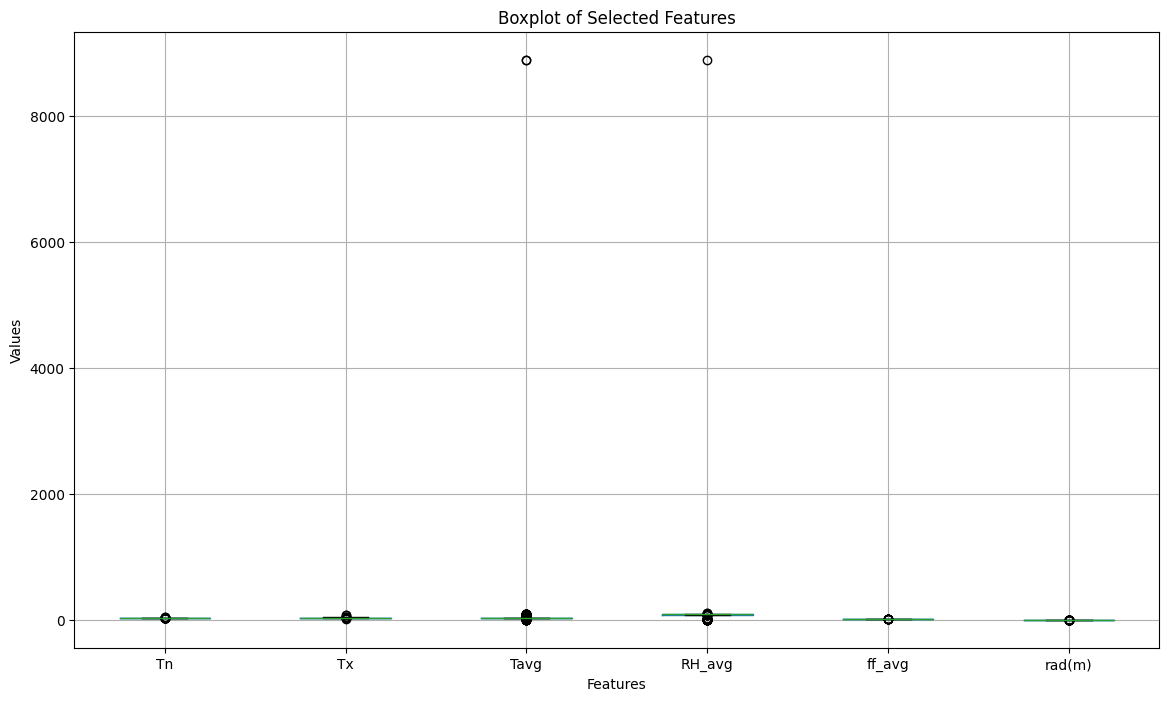

In [77]:
# Select the features to check for outliers

# Create a boxplot for each feature
plt.figure(figsize=(14, 8))
merged_data_sorted[features_to_check].boxplot()
plt.title('Boxplot of Selected Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

In [78]:
# # Save the merged data to a new CSV file
# merged_data_sorted.to_csv(os.path.join(cleaned_dataset_dir, 'used_cleaned_data.csv'), index=False)

In [79]:
def calculate_z_scores_and_outliers(dataframe, numeric_columns):
    # Menghitung z-score untuk kolom numerik
    z_scores = dataframe[numeric_columns].apply(zscore)

    # Tentukan ambang batas untuk outlier
    outliers = (z_scores > 3) | (z_scores < -3)

    return outliers

def detect_outliers(dataframe, numeric_columns):
    Q1 = merged_data_sorted[features_to_check].quantile(0.25)
    Q3 = merged_data_sorted[features_to_check].quantile(0.75)
    IQR = Q3 - Q1

    threshold = 3  # atau 2.5

    # Tentukan batas bawah dan atas untuk tiap kolom
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Outlier: nilai yang lebih kecil dari (Q1 - 1.5 * IQR) atau lebih besar dari (Q3 + 1.5 * IQR)
    outliers = (dataframe[numeric_columns] < lower_bound) | (dataframe[numeric_columns] > upper_bound)

    return outliers


# Call the function
outliers_z = calculate_z_scores_and_outliers(merged_data_sorted[features_to_check], numeric_columns)

# Call the function
outliers = detect_outliers(merged_data_sorted[features_to_check], numeric_columns)

print("Outliers using z-scores:")
display(outliers_z.sum())
print("Outliers using IQR:")
display(outliers.sum())

Outliers using z-scores:


Tn        26
Tx         3
Tavg       2
RH_avg     1
ff_avg    18
rad(m)    14
dtype: int64

Outliers using IQR:


Tn        11
Tx         3
Tavg      71
RH_avg    57
ff_avg     0
rad(m)     4
dtype: int64

In [80]:
display("Data before removing outliers:")   
display(merged_data_sorted.shape)

'Data before removing outliers:'

(1316, 12)

Fix Outlier

In [81]:
Q1 = merged_data_sorted[features_to_check].quantile(0.25)
Q3 = merged_data_sorted[features_to_check].quantile(0.75)
IQR = Q3 - Q1

threshold = 3  # atau 2.5

# Tentukan batas bawah dan atas untuk tiap kolom
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Ganti outlier dengan median hanya untuk kolom dalam features_to_check
for column in features_to_check:
    median = merged_data_sorted[column].median()
    
    # Cek apakah nilai lebih kecil dari batas bawah atau lebih besar dari batas atas
    outliers_mask = (merged_data_sorted[column] < lower_bound[column]) | (merged_data_sorted[column] > upper_bound[column])
    
    # Ganti outlier dengan median
    merged_data_sorted[column] = merged_data_sorted[column].where(~outliers_mask, median)

# Tampilkan data setelah penggantian
outliers_z = calculate_z_scores_and_outliers(merged_data_sorted, features_to_check)
outliers = detect_outliers(merged_data_sorted, features_to_check)

print("Outliers using z-scores:")
display(outliers_z.sum())
print("Outliers using IQR:")
display(outliers.sum())


Outliers using z-scores:


Tn        28
Tx         7
Tavg       7
RH_avg     9
ff_avg    18
rad(m)    10
dtype: int64

Outliers using IQR:


Tn        0
Tx        0
Tavg      0
RH_avg    0
ff_avg    0
rad(m)    0
dtype: int64

fix outliers using z-scores

In [82]:
# fix outliers using z-scores
# Calculate z-scores for the features
z_scores = merged_data_sorted[features_to_check].apply(zscore)

# Define a threshold for z-scores to identify outliers
threshold = 3

# Filter out the rows where any feature has a z-score greater than the threshold
merged_data_sorted = merged_data_sorted[(z_scores < threshold).all(axis=1)]

# Recalculate outliers after filtering
outliers_z = calculate_z_scores_and_outliers(merged_data_sorted, features_to_check)
outliers = detect_outliers(merged_data_sorted, features_to_check)

print("Outliers using z-scores:")
display(outliers_z.sum())
print("Outliers using IQR:")
display(outliers.sum())



Outliers using z-scores:


Tn        17
Tx         4
Tavg       6
RH_avg     5
ff_avg     0
rad(m)     2
dtype: int64

Outliers using IQR:


Tn        0
Tx        0
Tavg      0
RH_avg    0
ff_avg    0
rad(m)    0
dtype: int64

'Data after removing outliers:'

(1269, 12)

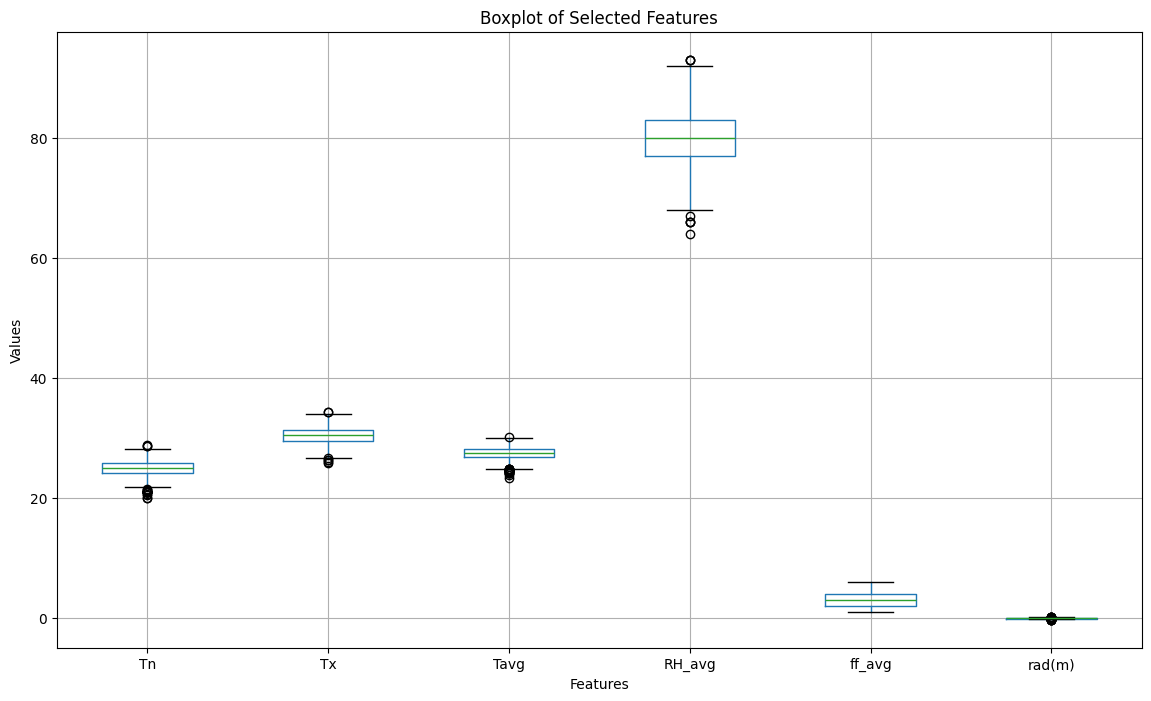

In [83]:
# Select the features to check for outliers
display("Data after removing outliers:")
display(merged_data_sorted.shape)

# Create a boxplot for each feature
plt.figure(figsize=(14, 8))
merged_data_sorted[features_to_check].boxplot()
plt.title('Boxplot of Selected Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

Remove the outliers


In [84]:
display("Data before removing outliers:")   
display(merged_data_sorted.shape)

'Data before removing outliers:'

(1269, 12)

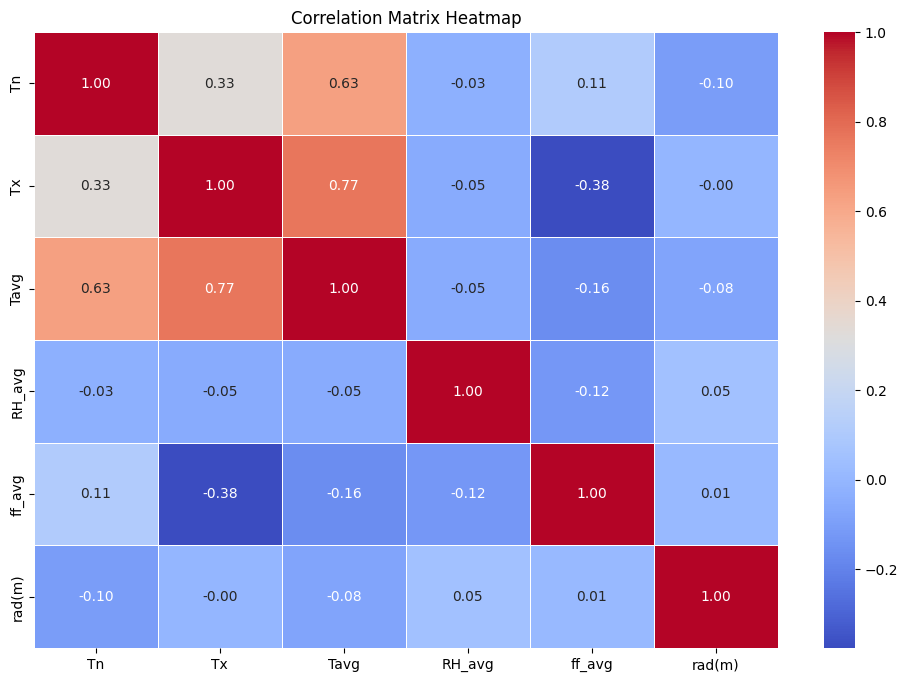

In [85]:
# Calculate the correlation matrix
correlation_matrix = merged_data_sorted[features_to_check].corr()

# Set the size of the plot
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set the title of the heatmap
plt.title('Correlation Matrix Heatmap')

# Display the heatmap
plt.show()

Cleaned Merged


In [86]:
# Save the merged data to a new CSV file
merged_data_sorted.to_csv(os.path.join(cleaned_dataset_dir, 'used_cleaned_data.csv'), index=False)